# TD2 : Réseaux de neurones convolutionnels


## Exercice 0

Repartir du dataset CIFAR10 en gardant les images en (32,32, 3)
Faire :
 - Convolution 2D (32,3)
 - Maxpooling (2,2)
 - Convolution 2D (32,3)
 - Maxpooling (2,2)
 - Flatten()
 - Créer un MLP avec une couche d'entrée de 1024 et une couche de sortie de 10 avec un softmax

In [3]:
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from keras.utils import to_categorical
from sklearn.neural_network import MLPClassifier

import tensorflow as tf

import numpy as np
from sklearn.preprocessing import StandardScaler

import tensorflow_datasets as tfds


Charger et formatter les données

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
# Convertir en float32 d'abord, puis normaliser
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
y_train_flat = y_train.flatten()
y_test_flat = y_test.flatten()

y_train = to_categorical(y_train_flat, 10)
y_test = to_categorical(y_test_flat, 10)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(32,32,3)))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

adam = tf.keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=50, verbose=1, batch_size=128)

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4096 - loss: 1.6677
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6326 - loss: 1.0535
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7081 - loss: 0.8461
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7608 - loss: 0.6956
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8167 - loss: 0.5473
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8586 - loss: 0.4205
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8981 - loss: 0.3127
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9313 - loss: 0.2201
Epoch 9/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9528 - loss: 0.1510
Epoch 10/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9672 - loss: 0.1122
Epoch 11/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9788 - loss: 0.0732
Epoch 12/100
391/391 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss : {test_loss:.4f}")
print(f"Test accuracy : {test_accuracy:.4f}")

train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Train loss : {train_loss:.4f}")
print(f"Train accuracy : {train_accuracy:.4f}")

Test loss : 6.5116
Test accuracy : 0.6623
Train loss : 0.0326
Train accuracy : 0.9924


Ajout de dropout pour réduire le sur apprentissage

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(32,32,3)))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation="softmax"))

adam = tf.keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


In [ ]:
model.fit(X_train, y_train, epochs=50, verbose=1, batch_size=128)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4186 - loss: 1.6582
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6371 - loss: 1.0369
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6987 - loss: 0.8632
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7503 - loss: 0.7290
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7852 - loss: 0.6258
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8184 - loss: 0.5285
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8573 - loss: 0.4273
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8802 - loss: 0.3569
Epoch 9/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9005 - loss: 0.3008
Epoch 10/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9163 - loss: 0.2486
Epoch 11/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9236 - loss: 0.2273
Epoch 12/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss : {test_loss:.4f}")
print(f"Test accuracy : {test_accuracy:.4f}")

train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Train loss : {train_loss:.4f}")
print(f"Train accuracy : {train_accuracy:.4f}")

Test loss : 1.7177
Test accuracy : 0.6989
Train loss : 0.0068
Train accuracy : 0.9989


## Exercice 1

### 1. Télécharger le dataset ‘stanford_dogs’ directement depuis votre notebook

In [ ]:
(train_set, test_set), dataset_info = tfds.load("stanford_dogs",
                                                 split=['train', 'test'],
                                                 shuffle_files=True,
                                                 as_supervised=True,
                                                 with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/stanford_dogs/incomplete.D2ZQG4_0.2.0/stanford_dogs-train.tfrecord*...:   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/stanford_dogs/incomplete.D2ZQG4_0.2.0/stanford_dogs-test.tfrecord*...:   0…

Dataset stanford_dogs downloaded and prepared to /root/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.


### 2 - Récupérez le nombre de classes à partir des informations. Combien y at’il de classes ?

In [ ]:
# Explorer la structure du dataset
print("\nInformations du dataset:")
print(f"Nombre de classes: {dataset_info.features['label'].num_classes}")
print(f"Noms des classes: {dataset_info.features['label'].names[:10]}...")  # Afficher les 10 premières

# Regarder la forme des données
print("\nEn regardant un échantillon du train_set:")
for i, (image, label) in enumerate(train_set.take(1)):
    print(f"Forme de l'image: {image.shape}")
    print(f"Type de l'image: {image.dtype}")
    print(f"Label: {label}")
    print(f"Valeurs min/max de l'image: {tf.reduce_min(image)}/{tf.reduce_max(image)}")
    break


Informations du dataset:
Nombre de classes: 120
Noms des classes: ['n02085620-chihuahua', 'n02085782-japanese_spaniel', 'n02085936-maltese_dog', 'n02086079-pekinese', 'n02086240-shih-tzu', 'n02086646-blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-rhodesian_ridgeback', 'n02088094-afghan_hound']...

En regardant un échantillon du train_set:
Forme de l'image: (500, 481, 3)
Type de l'image: <dtype: 'uint8'>
Label: 99
Valeurs min/max de l'image: 0/255


### Explication de la structure du dataset

Le dataset `stanford_dogs` chargé avec `tfds.load()` vous donne :

1. **`train_set` et `test_set`** : Ce sont des objets `tf.data.Dataset`, pas des arrays numpy classiques
2. **Chaque élément** contient un tuple `(image, label)` où :
   - `image` : Tensor de forme variable (les images ont des tailles différentes)
   - `label` : Entier représentant la classe (de 0 à 119 pour les 120 races de chiens)

**Points importants :**
- Les images ont des **tailles différentes** (ex: 500x333, 400x600, etc.)
- Les valeurs des pixels sont en **uint8** (0-255)
- Pour utiliser le dataset, vous devez l'itérer avec `.take()`, `.batch()`, etc.

### 3 - Visualisez les premières images du dataset à l’aide de la méthode show_examples

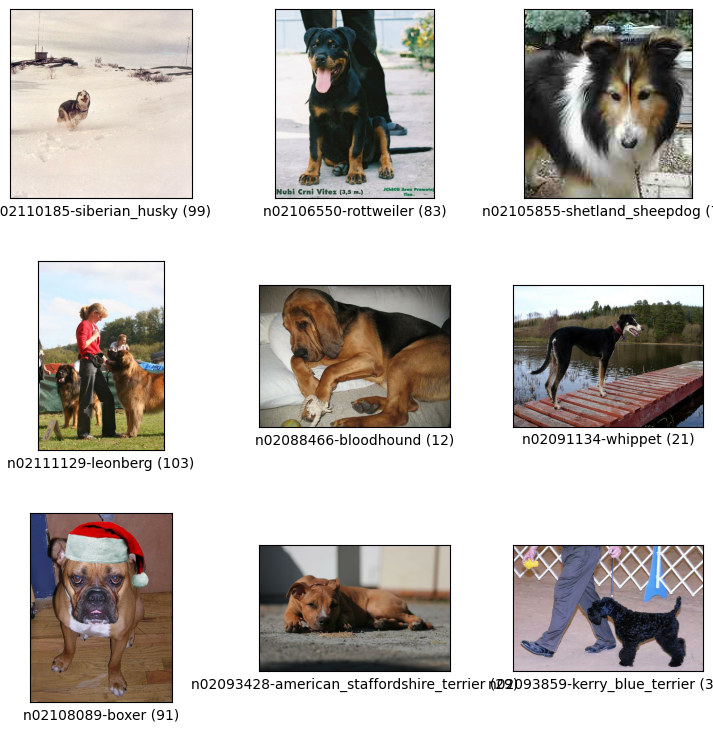

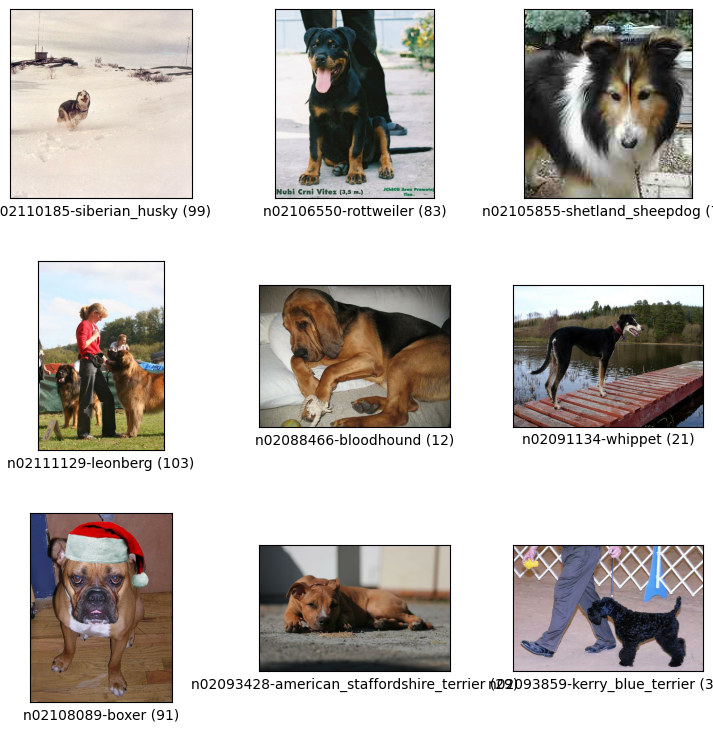

In [ ]:
tfds.visualization.show_examples(train_set, dataset_info)

### 4 - Récupérez la première image. Cela peut se faire avec next et iter, ou bien avec take et get_single_element. Attention, n’oubliez pas que ces méthodes récupères un tuple (image, label).

In [ ]:
first_img = train_set.take(1)
for img, label in first_img:
 image = img
 label = label

### 5 - Convertissez cette image en grayscale avec rgb_to_grayscale.

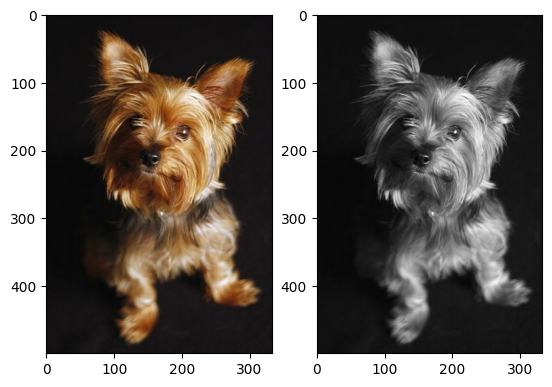

In [ ]:
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(image)
img_grey = tf.image.rgb_to_grayscale(image)
fig.add_subplot(1,2,2)
plt.imshow(img_grey, cmap='gray')
plt.show()

### 6 - Une couche de convolution va être appliquée sur l’image grayscale. En tensorflow, les données sont transmises aux différentes couches des réseaux de neurones par batch. Il faut donc rajouter une dimension devant l’image pour représenter le batch. Dans un premier temps, vérifier les dimensions de l’image (avec np.shape par exemple). Ajoutez une dimension avec expand_dims, puis vérifiez le résultat.

In [ ]:
print(np.shape(image))
print(np.shape(img_grey))
img_grey = tf.expand_dims(input=img_grey, axis=0)
print(np.shape(img_grey))

(500, 333, 3)
(500, 333, 1)
(1, 500, 333, 1)


### 7 - Définissez un noyau de convolution, à l’aide d’un array numpy à 2 dimensions. Chacune des dimenions devra contenir 3 éléments de type float32. Définissez les valeurs vous-même, manuellement.

In [ ]:
conv_kernel = [[1, 0, -1], [0, 1, 0], [1, -2, 1]]
conv_kernel = np.array(conv_kernel, dtype=np.float32)
print(conv_kernel)

[[ 1.  0. -1.]
 [ 0.  1.  0.]
 [ 1. -2.  1.]]


### 8 - Vous allez maintenant appliquer le noyau de convolution sur l’image grayscale, à l’aide de tf.nn.conv2d. Utilisez un stride de 1 et un padding ‘SAME’. Le noyau doit avoir les bonnes dimensions pour être utilisé par conv2d. Il faut le redimensionner à l’aide de tf.reshape. Les dimensions sont [hauteur, largeur, canaux_entrants, canaux_sortant]. Appliquez le filtre et visualisez l’image en mode ‘grayscale’ (plt.imshow(..., cmap = ‘grayscale’))

In [ ]:
img_grey = tf.cast(img_grey, dtype=tf.float32)
conv_kernel = conv_kernel.reshape((3,3,1,1))
img_grey = tf.nn.conv2d(input=img_grey, filters=conv_kernel, strides=[1], padding='SAME')

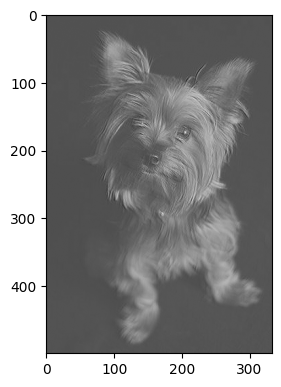

In [ ]:
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(tf.squeeze(img_grey), cmap='gray')
plt.show()

### 9 - Maintenant que vous savez appliquer un noyau, améliorez votre programme afin qu’il implémente un filtre de Sobel https://fr.wikipedia.org/wiki/Filtre_de_Sobel

In [ ]:
conv_kernel = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
conv_kernel = np.array(conv_kernel, dtype=np.float32)
print(conv_kernel)

img_grey = tf.cast(img_grey, dtype=tf.float32)
conv_kernel = conv_kernel.reshape((3,3,1,1))
img_grey = tf.nn.conv2d(input=img_grey, filters=conv_kernel, strides=[1], padding='SAME')

[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]


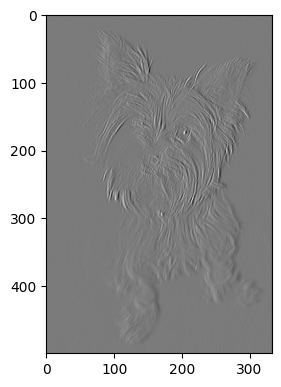

In [ ]:
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(tf.squeeze(img_grey), cmap='gray')
plt.show()

## Exercice 3

## 1 - Télécharger le dataset ‘stanford_dogs‘ depuis votre notebook avec les mêmes options que dans l’exercice précédent. Normalement, le dataset est déjà sur votre machine. Cette opération devrait donc être très rapide cette fois

In [ ]:
(train_set, test_set), dataset_info = tfds.load("stanford_dogs",
                                                 split=['train', 'test'],
                                                 shuffle_files=True,
                                                 as_supervised=True,
                                                 with_info=True)

### 2 - Le dataset est composé d’un jeu d’entraînement et d’un jeu de test. Pour chacun de ces jeux, vous allez appliquer une transformation sur les labels. Les labels sont décrits par défaut comme des nombres entiers, vous allez les convertir avec un encodage ‘one_hot’. Pour réaliser cela, vous pouvez vous aider de la fonction map qui peut être appliquée sur un dataset, ainsi que de la fonction de Tensorflow one_hot.

In [ ]:
train_set = train_set.map(lambda img, label: (img, tf.one_hot(label, dataset_info.features['label'].num_classes)))
test_set = test_set.map(lambda img, label: (img, tf.one_hot(label, dataset_info.features['label'].num_classes)))


In [ ]:
for i, l in train_set.take(1):
  print(l)


tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(120,), dtype=float32)


### 3 - Toutes les images n’ont pas la même taille dans le dataset. Vous allez donc appliquer des transformations aux images pour qu’elles aient toutes les mêmes dimensions : 128x128. Ensuite, vous allez normaliser les valeurs des pixels pour qu’elles soient entre 0 et 1 (pour aider l’apprentissage). Pour appliquer ces transformations, vous allez utiliser une couche de preprocessing. Celle-ci se déclare comme un modèle Sequential auquel vous passerez en paramètre une couche Resizing ainsi qu’une couche Rescaling). Pour commencer, appliquer cette procédure sur une seule image.

In [ ]:
model_prepoc = tf.keras.Sequential()
model_prepoc.add(tf.keras.layers.Resizing(128,128))
model_prepoc.add(tf.keras.layers.Rescaling(1.0/255.0))
model_prepoc.compile()

### 4 - Appliquez les transformations à l’ensemble du dataset à l’aide de la fonction map

In [ ]:
train_set = train_set.map(lambda img, label: (model_prepoc(img), label))
test_set = test_set.map(lambda img, label: (model_prepoc(img), label))

### 5 - Similairement, il est possible de faire de l’augmentation de données à l’aide de couches de preprocessing. Différents types de couches sont disponibles :
- RandomBrightness
- RandomContrast
- RandomFlip
- RandomRotation
- RandomTranslation
- RandomZoom
- …


In [ ]:
model_random_brighness = tf.keras.Sequential()
model_random_brighness.add(tf.keras.layers.RandomBrightness(factor=0.3,value_range=(0,1)))
model_random_brighness.compile()

In [ ]:
model_random_contrast = tf.keras.Sequential()
model_random_contrast.add(tf.keras.layers.RandomContrast(factor=0.8, value_range=(0,1)))
model_random_contrast.compile()

In [ ]:
model_random_flip = tf.keras.Sequential()
model_random_flip.add(tf.keras.layers.RandomFlip())
model_random_flip.compile()

In [ ]:
model_random_rotation = tf.keras.Sequential()
model_random_rotation.add(tf.keras.layers.RandomRotation(0.7))
model_random_rotation.compile()

In [ ]:
model_random_translation = tf.keras.Sequential()
model_random_translation.add(tf.keras.layers.RandomTranslation(0.4, 0.6))
model_random_translation.compile()

In [ ]:
model_random_zoom = tf.keras.Sequential()
model_random_zoom.add(tf.keras.layers.RandomZoom(-1.0))
model_random_zoom.compile()

In [ ]:
random_img = train_set.take(1)
for i, l in random_img:
  img = i
  label = l

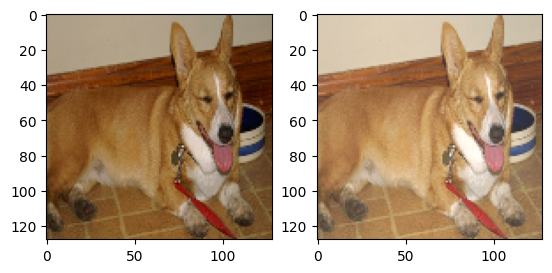

In [ ]:
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(img)
img_random_brighness = model_random_brighness(img)
fig.add_subplot(1,2,2)
plt.imshow(img_random_brighness)
plt.show()

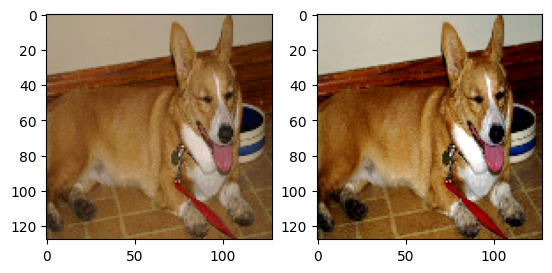

In [ ]:
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(img)
img_random_contrast = model_random_contrast(img)
fig.add_subplot(1,2,2)
plt.imshow(img_random_contrast)
plt.show()

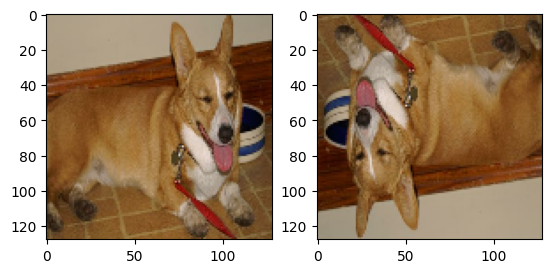

In [ ]:
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(img)
img_random_flip = model_random_flip(img)
fig.add_subplot(1,2,2)
plt.imshow(img_random_flip)
plt.show()

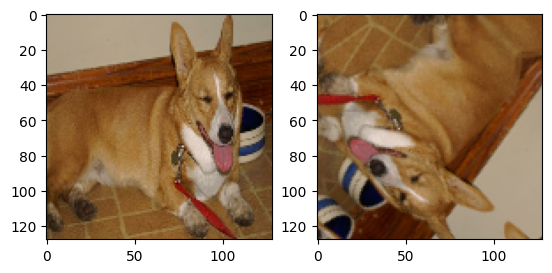

In [ ]:
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(img)
img_random_rotation = model_random_rotation(img)
fig.add_subplot(1,2,2)
plt.imshow(img_random_rotation)
plt.show()

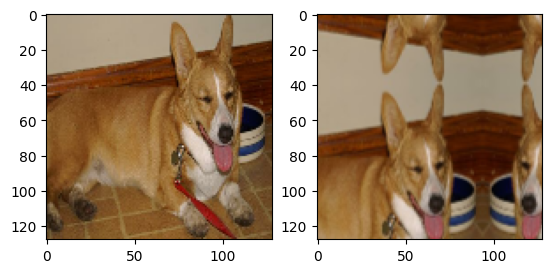

In [ ]:
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(img)
img_random_translation = model_random_translation(img)
fig.add_subplot(1,2,2)
plt.imshow(img_random_translation)
plt.show()

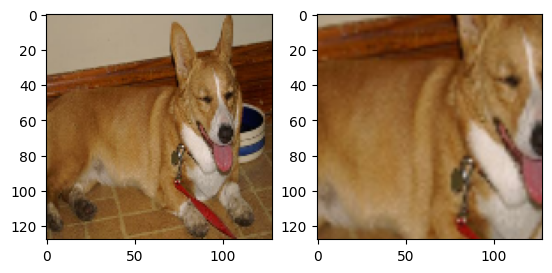

In [ ]:
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(img)
img_random_zoom = model_random_zoom(img)
fig.add_subplot(1,2,2)
plt.imshow(img_random_zoom)
plt.show()

## Exercice 4

## 1 - Téléchargez et préparez le dataset ‘beans’ pour l’entrainement.

In [4]:
(train_set, test_set), dataset_info = tfds.load("beans",
                                                 split=['train', 'test'],
                                                 shuffle_files=True,
                                                 as_supervised=True,
                                                 with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/incomplete.CXZGR4_0.1.0/beans-train.tfrecord*...:   0%|          | 0…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/incomplete.CXZGR4_0.1.0/beans-validation.tfrecord*...:   0%|        …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/incomplete.CXZGR4_0.1.0/beans-test.tfrecord*...:   0%|          | 0/…

Dataset beans downloaded and prepared to /root/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.


In [5]:
model_prepoc = tf.keras.Sequential()
model_prepoc.add(tf.keras.layers.Resizing(128,128))
model_prepoc.add(tf.keras.layers.Rescaling(1.0/255.0))
model_prepoc.compile()

In [6]:
train_set = train_set.map(lambda img, label: (model_prepoc(img), label))
test_set = test_set.map(lambda img, label: (model_prepoc(img), label))

In [7]:
train_set = train_set.map(lambda img, label: (img, tf.one_hot(label, dataset_info.features['label'].num_classes)))
test_set = test_set.map(lambda img, label: (img, tf.one_hot(label, dataset_info.features['label'].num_classes)))

In [24]:
train_set = train_set.batch(128)
test_set = test_set.batch(128)

## 2 - Implémentez une fonction qui retourne un réseau de neurones convolutionnel. Pour cela, vous allez créer un modèle Sequential vide auquel vous allez ajouter une série de couches Conv2D et MaxPooling2D. Le modèle suivra l’architecture des réseaux VGG : 1 bloc VGG est constitué de 2 couches convolutionnelles (padding : ‘same’) suivies d’une couche MaxPooling2D. Votre réseau doit contenir 3 blocs avec des nombres de filtres en sortie des couches convolutionnelles différents dans chaque : 32 dans le premier bloc, 64 dans le second et 128 dans le troisième.

## Vous terminerez votre réseau avec une couche Flatten() et une couche Dense. Attention à bien paramétrer les couches pour que tout soit compatible avec les données en entrée. N’oubliez pas d’ajouter les fonctions d’activations appropriées.

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(128,128,3)))

# 1ere couche VGG
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same'))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
# 2eme couche VGG
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
# 3eme couche VGG
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same'))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(3, activation="relu"))

adam = tf.keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


### 3 - Compilez votre réseau avec compile, et affichez le détail de l’architecture créée. Observez le nombre de paramètres pour chaque couche. La première couche convolutionnelle doit contenir 896 paramètres et la seconde 9248. Pourquoi ces nombres ? Comment calculer le nombre de paramètres d’une couche convolutionnelle ?

In [10]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │        98,307 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 385,315 (1.47 MB)

 Trainable params: 385,315 (1.47 MB)

 Non-trainable params: 0 (0.00 B)

### 4 - Entrainez le sur le dataset avec fit pendant 50 epochs. Lors de l’entrainement, utilisez un ensemble de validation avec 10 % des données. Lors de l’appel à fit, récupérez le résultat dans une variable history (history = mon_reseau.fit(…)). Utilisez une métrique pour enregistrer l’accuracy à chaque epoch.

In [11]:
history = model.fit(train_set, epochs=50, verbose=1, batch_size=128)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 28s 746ms/step - accuracy: 0.2953 - loss: 9.8994
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 235ms/step - accuracy: 0.3306 - loss: 5.5968
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 354ms/step - accuracy: 0.3616 - loss: 5.5872
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 239ms/step - accuracy: 0.3280 - loss: 5.5890
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - accuracy: 0.3280 - loss: 5.5919
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - accuracy: 0.3280 - loss: 5.5913
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 234ms/step - accuracy: 0.3280 - loss: 5.5896
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 354ms/step - accuracy: 0.3303 - loss: 5.5888
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 239ms/step - accuracy: 0.3303 - loss: 5.5889
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 232ms/step - accuracy: 0.3323 - loss: 5.5888
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 234ms/step - accuracy: 0.3330 - loss: 5.5882
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 235ms/step - accuracy: 0.3423 - l

### 5 - Une fois l’entrainement terminé, utlisez le contenu de history pour tracer des courbes d’évolution de la loss et de l’accuracy, sur les ensembles d’entrainement et de validation

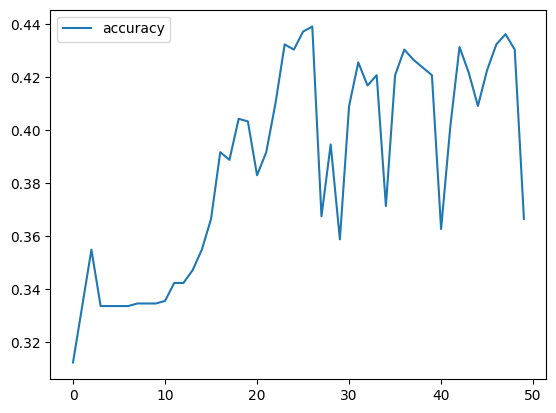

In [21]:
df = pd.DataFrame({
    'accuracy': history.history['accuracy'],
})

lines = df.plot.line()



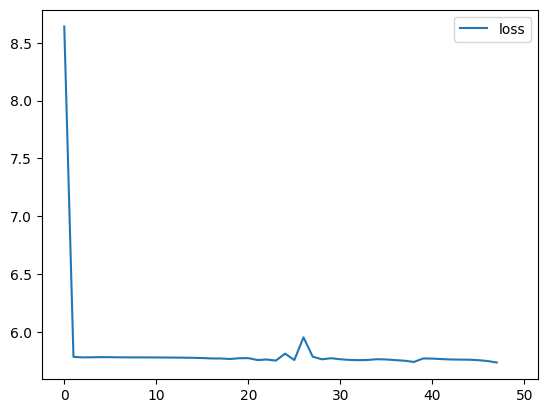

In [22]:
df = pd.DataFrame({
    'loss': history.history['loss']
})

lines = df.plot.line()

### 6 - Pour finir, testez le réseau sur des données non observées lors de l’entrainement. Le résultat est-il satisfaisant ?

In [25]:
history_test = model.fit(test_set, epochs=50, verbose=1, batch_size=128)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step - accuracy: 0.4688 - loss: 5.7266
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.4766 - loss: 5.7269
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.4688 - loss: 5.7274
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.4453 - loss: 5.7281
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.4453 - loss: 5.7288
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.4219 - loss: 5.7295
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.4141 - loss: 5.7301
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.3984 - loss: 5.7306
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.3906 - loss: 5.7309
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.3906 - loss: 5.7310
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.3906 - loss: 5.7310
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.3906 - lo

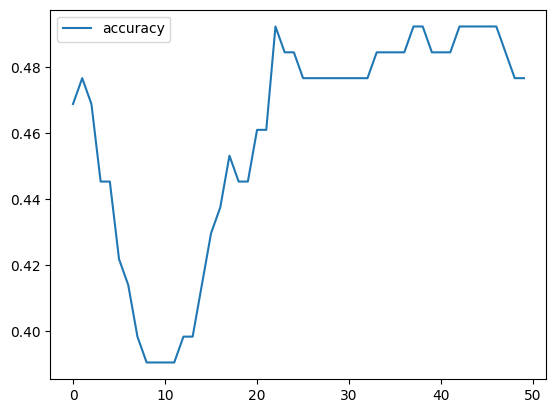

In [26]:
df = pd.DataFrame({
    'accuracy': history_test.history['accuracy']
})

lines = df.plot.line()

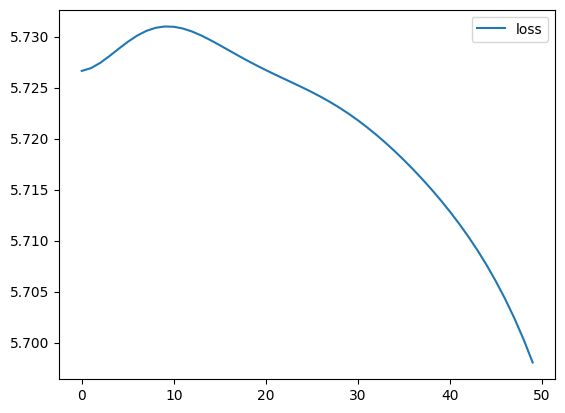

In [27]:
df = pd.DataFrame({
    'loss': history_test.history['loss']
})

lines = df.plot.line()